In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx
from collections import defaultdict
import math 
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


In [ ]:
nqs["aqt_ibexq1"]

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++    QPU: aqt_ibexq1    +++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
----------------------------    5    ----------------------------
Mean of means: 0.6793
T-score: 4.784
P-value: 0.00000807
mu_new is significantly different at 3σ level (reject H0).
aqt_ibexq1 | nq:5| random: 0.7589670005558797 | QPU:0.8063636363636364 |reff:0.1966396133187764 | peff: 3
----------------------------    6    ----------------------------
Mean of means: 0.5899
T-score: 1.601
P-value: 0.05790654
mu_new is consistent with the sample (fail to reject H0).
aqt_ibexq1 | nq:6| random: 0.6523792489607397 | QPU:0.6232258064516131 |reff:-0.08386565652933092 | peff: 5
----------------------------    7    ----------------------------
Mean of means: 0.5712
T-score: 0.974
P-value: 0.16749596
mu_new is consistent with the sample (fail to reject H0).


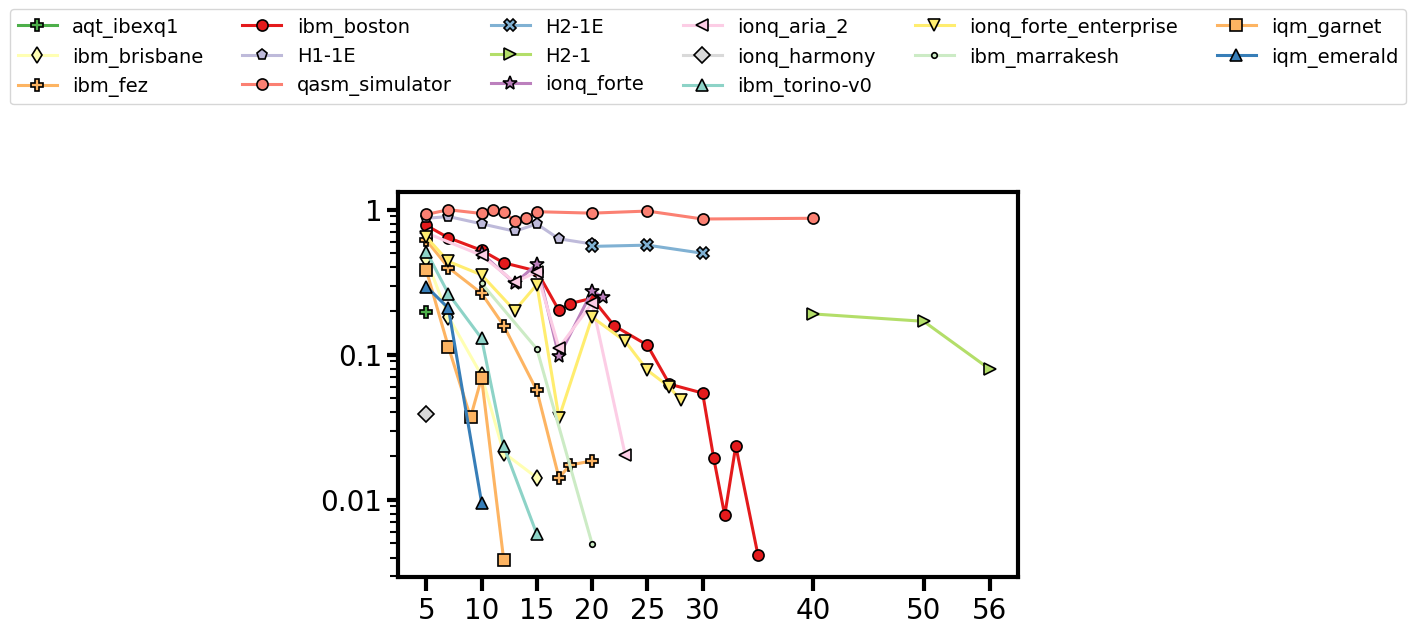

In [2]:
from scipy import stats

colors = plt.get_cmap("Set3")
colors2 = plt.get_cmap("Set1")
prop = "r"
case = ""
nqs = {"ibm_boston":[5,7,10,12,15,17,18,20,22,25,27,30,31,32,33,34,35], "ionq_forte":[10,13,15,17,20,21,23,25,27,30,35], "ibm_brisbane":[5,7,10,12,14,15,17,20], "ibm_fez":[5,7,10,12,15,17,18,20,22,25], "ibm_torino":[5,7,10,12,15,17,20,30,40], "ionq_harmony":[5,7,10], "iqm_garnet":[5,7,9,10,12,13,14,15],
       "H1-1E":[5,7,10,13,15,17,20],"H2-1E":[20,25,30],"qasm_simulator":[5,7,10,11,12,13,14,15,20,25],"ionq_aria_2":[5,10,13,15,17,20,23,25], "random":[5,7,10,11,12,13,14,15,16,17,20,25,30,35], "H2-1":[40, 50, 56],"ionq_forte_enterprise":[5,7,10,13,15,17,20,23,25,27,28,29,30], "ibm_marrakesh":[10,15,17,20], "iqm_emerald":[5,7,10,12,15], "aqt_ibexq1":[5,6,7,10,12]}
colors = {"aqt_ibexq1":colors2(2), "ibm_boston":colors2(0),"ionq_forte":colors(9), "ibm_torino":colors(0), "ibm_brisbane":colors(1), "H1-1E":colors(2), "qasm_simulator":colors(3), "H2-1E":colors(4), "ibm_fez":colors(5), "H2-1":colors(6), "ionq_aria_2":colors(7), "ionq_harmony":colors(8), "ionq_forte_enterprise":colors(11), "ibm_marrakesh":colors(10), "iqm_garnet":colors(5), "iqm_emerald":colors2(1)}
markers = {"aqt_ibexq1":"P","ibm_boston":"o","ionq_forte":"*","ibm_torino":"^", "ibm_brisbane":"d", "H1-1E":"p", "qasm_simulator":"o", "H2-1E":"X", "random":".", "ibm_fez":"P", "H2-1":">", "ionq_aria_2":"<", "ionq_harmony":"D", "ibm_marrakesh":".","ionq_forte_enterprise":"v", "iqm_garnet":"s", "iqm_emerald":"^"}
res_hpc = np.load(f"./Data/LR_HPC_WMC_B.npy", allow_pickle=True).item()
r = {}
backends = ["aqt_ibexq1","ibm_brisbane","ibm_fez","ibm_boston", "H1-1E","qasm_simulator", "H2-1E", "H2-1", "ionq_forte", "ionq_aria_2", "ionq_harmony", "ibm_torino", "ionq_forte_enterprise", "ibm_marrakesh", "iqm_garnet", "iqm_emerald"]
r_hpc = []

r = defaultdict(dict)
for backend_name in backends:
    r_max = []
    print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"+++++++++++++++++++++++++++    QPU: {backend_name}    +++++++++++++++++++++++++++")
    print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for nq in nqs[backend_name]:
        results= np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
        postprocessing = results["postprocessing"+case]
        postprocessing_random = results["random"+case]
        shots = sum(list(results["samples"][results["Deltas"][0]][results["ps"][0]].values()))
        rand_data = []
        for v, c in zip(postprocessing_random["results"][:,1],postprocessing_random["results"][:,2]):
            rand_data += int(c) * [v]
        rand_data = np.array(rand_data)
        secs_rand = 10
        div_rand = len(rand_data)//secs_rand
        rand_mean = np.array([np.mean(rand_data[i*div_rand:(i+1)*div_rand]) for i in range(secs_rand)])
        rand_mean = []
        np.random.seed(1)
        n_rand = 50
        for i in range(n_rand):
            np.random.shuffle(rand_data)
            rand_mean.append(np.mean(rand_data[:shots]))
        rand_mean = np.array(rand_mean)
        y1 = rand_mean.mean()
        y2 = 3*rand_mean.std()

        deltas = results["Deltas"]
        ps = results["ps"]
        sections = results["sections"]
        r_max_nq = np.max([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])
        p_eff = results["ps"][np.argmax([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])]

        r_max.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))

        std = rand_mean.std()

        t_score = (r_max_nq - y1) / std

        # p-value for two-tailed test
        p_value = (1 - stats.t.cdf(t_score, df=n_rand-1))
        print(f"----------------------------    {nq}    ----------------------------")
        print(f"Mean of means: {y1:.4f}")
        print(f"T-score: {t_score:.3f}")
        print(f"P-value: {p_value:.8f}")

        if p_value < 0.001:
            print("mu_new is significantly different at 3σ level (reject H0).")
            r[backend_name][nq] = ((r_max_nq - (y1+y2))/(1-(y1+y2)))
        else:
            print("mu_new is consistent with the sample (fail to reject H0).")
        
        print(f"{backend_name} | nq:{nq}| random: {y1+y2} | QPU:{r_max_nq} |reff:{r_max[-1]} | peff: {p_eff}")

        if backend_name == "ibm_torino" and nq in [30, 40]:
            r_max_nq = res_hpc[nq][0]["objective"]["r"]
            r_hpc.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))
            r["qasm_simulator"][nq] = r_hpc[-1]
    # r[backend_name] = r_max
    

nqs["qasm_simulator"] += [30,40]
fig, ax = plt.subplots(figsize=(8,5))
for backend_name in backends:
    # ax.plot([nqs[backend_name][ni] for ni, ri in enumerate(r[backend_name]) if ri > 0], [ri for ni, ri in enumerate(r[backend_name]) if ri > 0], marker=markers[backend_name], markeredgecolor="black", label=backend_name if backend_name != "ibm_torino" else "ibm_torino-v0", color=colors[backend_name], markersize=10 if backend_name=="ionq_forte" else 8)
    ax.plot(r[backend_name].keys(),r[backend_name].values(), marker=markers[backend_name], markeredgecolor="black", label=backend_name if backend_name != "ibm_torino" else "ibm_torino-v0", color=colors[backend_name], markersize=10 if backend_name=="ionq_forte" else 8)

ax.set_xticks([5,10,15,20,25,30,40,50,56])
ax.set_yscale("log")
ax.set_yticks([0.01,0.1, 1])
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.5), ncol=6)

ax.set_yticklabels([0.01,0.1, 1])
fig.savefig(f"./Figures/FC/r_vs_rand{case}_legend.pdf", bbox_inches="tight", transparent=True)


In [ ]:
backend = "ibm_fez"
nq = 25
p = 10
sec = 0
results = np.load(f"./Data/{backend}/{nq}_FC.npy", allow_pickle=True).item()
delta=list(results["postprocessing"].keys())[0]
n_cases = 50
shots = len(results["postprocessing"][delta][p][sec]["results"][:,1])
rand_data = results["random"]["results"][:,1]
rand_mean = []
fig, ax = plt.subplots()

np.random.seed(1)
rand_data = results["random"]["results"][:,1]
for i in range(n_cases):
    np.random.shuffle(rand_data)
    ax.plot([i+1], np.mean(rand_data[:shots]), marker="o", linewidth=0, color="black")
    rand_mean.append(np.mean(rand_data[:shots]))
ax.plot([], [], marker="o", linewidth=0, color="black", label="random mean")

rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.plot(list(results["postprocessing"][delta].keys()), [results["postprocessing"][delta][p][sec]["r"] for p in results["ps"]], marker="X", linewidth=0, markersize=10, markeredgecolor="black", label="QPU mean", color="tab:orange")

ax.fill_between([0, n_cases], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.6, edgecolor="black", label=r"random $\sigma \pm 3$")
# ax.set_ylim(0.7,0.94)
ax.legend()
fig.savefig(f"./Figures/FC/sampling_{nq}_{backend}_{p}.pdf", bbox_inches="tight", transparent=True)


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++    QPU: ibm_brisbane    +++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
----------------------------    5    ----------------------------
Mean of means: 0.6784
T-score: 3524032135933657.500
P-value: 0.00000000
mu_new is significantly different at 3σ level (reject H0).
ibm_brisbane | nq:5| random: 0.6784000000000001 | QPU:0.824790909090909 |reff:0.45519561284486615 | peff: 3
----------------------------    7    ----------------------------
Mean of means: 0.5714
T-score: 1065017444846609.625
P-value: 0.00000000
mu_new is significantly different at 3σ level (reject H0).
ibm_brisbane | nq:7| random: 0.5713696000000004 | QPU:0.6498016000000002 |reff:0.1829828215637526 | peff: 3
----------------------------    10    ----------------------------
Mean of means: 0.6555
T-score: 337166227971781.312
P-value: 0.00000000
mu_new i

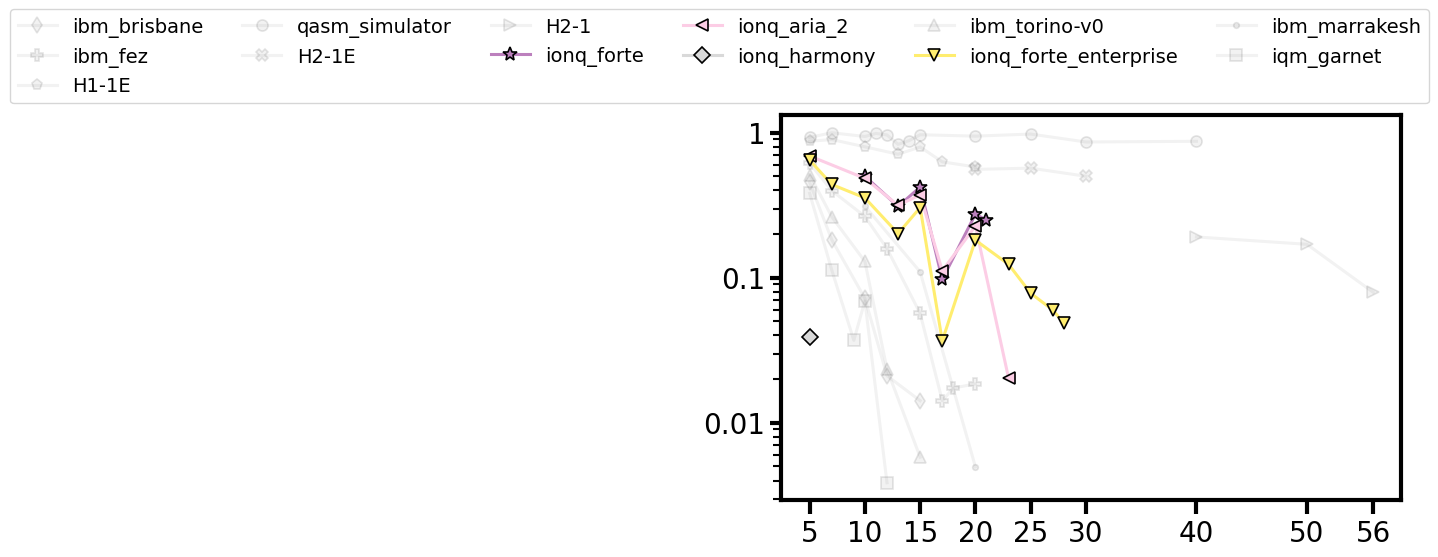

In [13]:
from scipy import stats

colors = plt.get_cmap("Set3")
prop = "r"
case = ""
nqs = {"ionq_forte":[10,13,15,17,20,21,23,25,27,30,35], "ibm_brisbane":[5,7,10,12,14,15,17,20], "ibm_fez":[5,7,10,12,15,17,18,20,22,25], "ibm_torino":[5,7,10,12,15,17,20,30,40], "ionq_harmony":[5,7,10], "iqm_garnet":[5,7,9,10,12,13,14,15],
       "H1-1E":[5,7,10,13,15,17,20],"H2-1E":[20,25,30],"qasm_simulator":[5,7,10,11,12,13,14,15,20,25],"ionq_aria_2":[5,10,13,15,17,20,23,25], "random":[5,7,10,11,12,13,14,15,16,17,20,25,30,35], "H2-1":[40, 50, 56],"ionq_forte_enterprise":[5,7,10,13,15,17,20,23,25,27,28,29,30], "ibm_marrakesh":[10,15,17,20]}
colors = {"ionq_forte":colors(9), "ibm_torino":colors(0), "ibm_brisbane":colors(1), "H1-1E":colors(2), "qasm_simulator":colors(3), "H2-1E":colors(4), "ibm_fez":colors(5), "H2-1":colors(6), "ionq_aria_2":colors(7), "ionq_harmony":colors(8), "ionq_forte_enterprise":colors(11), "ibm_marrakesh":colors(10), "iqm_garnet":colors(5)}
markers = {"ionq_forte":"*","ibm_torino":"^", "ibm_brisbane":"d", "H1-1E":"p", "qasm_simulator":"o", "H2-1E":"X", "random":".", "ibm_fez":"P", "H2-1":">", "ionq_aria_2":"<", "ionq_harmony":"D", "ibm_marrakesh":".","ionq_forte_enterprise":"v", "iqm_garnet":"s"}
res_hpc = np.load(f"./Data/LR_HPC_WMC_B.npy", allow_pickle=True).item()
r = {}
backends = ["ibm_brisbane","ibm_fez", "H1-1E","qasm_simulator", "H2-1E", "H2-1", "ionq_forte", "ionq_aria_2", "ionq_harmony", "ibm_torino", "ionq_forte_enterprise", "ibm_marrakesh", "iqm_garnet"]
r_hpc = []
used = [["qasm_simulator"], ["H2-1E", "H2-1", "H1-1E"], ["ionq_harmony","ionq_aria_2","ionq_forte","ionq_forte_enterprise"], ["ibm_fez","ibm_marrakesh"], ["ibm_brisbane","ibm_torino","iqm_garnet"],[]]
n_used = 2
r = defaultdict(dict)
for backend_name in backends:
    r_max = []
    print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"+++++++++++++++++++++++++++    QPU: {backend_name}    +++++++++++++++++++++++++++")
    print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for nq in nqs[backend_name]:
        results= np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
        postprocessing = results["postprocessing"+case]
        postprocessing_random = results["random"+case]
        shots = sum(list(results["samples"][results["Deltas"][0]][results["ps"][0]].values()))
        rand_data = []
        for v, c in zip(postprocessing_random["results"][:,1],postprocessing_random["results"][:,2]):
            rand_data += int(c) * [v]
        rand_data = np.array(rand_data)
        secs_rand = 10
        div_rand = len(rand_data)//secs_rand
        rand_mean = np.array([np.mean(rand_data[i*div_rand:(i+1)*div_rand]) for i in range(secs_rand)])
        rand_mean = []
        np.random.seed(1)
        n_rand = 50
        for i in range(n_rand):
            np.random.shuffle(rand_data)
            rand_mean.append(np.mean(rand_data[:shots]))
        rand_mean = np.array(rand_mean)
        y1 = rand_mean.mean()
        y2 = 3*rand_mean.std()

        deltas = results["Deltas"]
        ps = results["ps"]
        sections = results["sections"]
        r_max_nq = np.max([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])
        p_eff = results["ps"][np.argmax([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])]

        r_max.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))

        std = rand_mean.std()

        t_score = (r_max_nq - y1) / std

        # p-value for two-tailed test
        p_value = (1 - stats.t.cdf(t_score, df=n_rand-1))
        print(f"----------------------------    {nq}    ----------------------------")
        print(f"Mean of means: {y1:.4f}")
        print(f"T-score: {t_score:.3f}")
        print(f"P-value: {p_value:.8f}")

        if p_value < 0.001:
            print("mu_new is significantly different at 3σ level (reject H0).")
            r[backend_name][nq] = ((r_max_nq - (y1+y2))/(1-(y1+y2)))
        else:
            print("mu_new is consistent with the sample (fail to reject H0).")
        
        print(f"{backend_name} | nq:{nq}| random: {y1+y2} | QPU:{r_max_nq} |reff:{r_max[-1]} | peff: {p_eff}")

        if backend_name == "ibm_torino" and nq in [30, 40]:
            r_max_nq = res_hpc[nq][0]["objective"]["r"]
            r_hpc.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))
            r["qasm_simulator"][nq] = r_hpc[-1]
    # r[backend_name] = r_max
    

nqs["qasm_simulator"] += [30,40]
fig, ax = plt.subplots(figsize=(8,5))
for backend_name in backends:
    # ax.plot([nqs[backend_name][ni] for ni, ri in enumerate(r[backend_name]) if ri > 0], [ri for ni, ri in enumerate(r[backend_name]) if ri > 0], marker=markers[backend_name], markeredgecolor="black", label=backend_name if backend_name != "ibm_torino" else "ibm_torino-v0", color=colors[backend_name], markersize=10 if backend_name=="ionq_forte" else 8)
    ax.plot(r[backend_name].keys(),r[backend_name].values(), marker=markers[backend_name], markeredgecolor="black", label=backend_name if backend_name != "ibm_torino" else "ibm_torino-v0", color=colors[backend_name] if backend_name in used[n_used] else "gray", alpha=1 if backend_name in used[n_used] else 0.1, markersize=10 if backend_name=="ionq_forte" else 8)

ax.set_xticks([5,10,15,20,25,30,40,50,56])
ax.set_yscale("log")
ax.set_yticks([0.01,0.1, 1])
ax.legend(loc="upper center", bbox_to_anchor=(-0.1,1.3), ncol=6)

ax.set_yticklabels([0.01,0.1, 1])
fig.savefig(f"./Figures/FC/r_vs_rand{case}_legend_{n_used}.pdf", bbox_inches="tight", transparent=True)


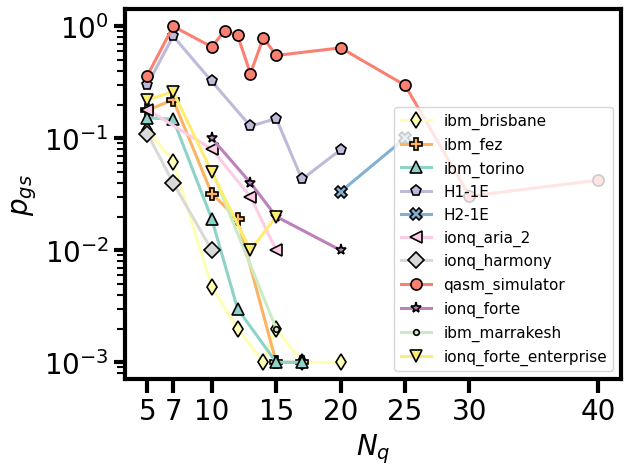

In [9]:
colors = plt.get_cmap("Set3")
prop = "probability"
case = ""
nqs = {"ionq_forte":[10,13,15,17,20,21,23,25,30,35], "ibm_brisbane":[5,7,10,12,14,15,17,20], "ibm_fez":[5,7,10,12,15,17,18,20,22,25], "ibm_torino":[5,7,10,12,15,17,20,30,40], "ionq_harmony":[5,7,10],
       "H1-1E":[5,7,10,13,15,17,20],"H2-1E":[20,25,30],"qasm_simulator":[5,7,10,11,12,13,14,15,20,25],"ionq_aria_2":[5,10,13,15,17,20,23,25], "random":[5,7,10,11,12,13,14,15,16,17,20,25,30,35], "H2-1":[40, 50, 56],"ionq_forte_enterprise":[5,7,10,13,15], "ibm_marrakesh":[10,15,17,20]}
colors = {"ionq_forte":colors(9), "ibm_torino":colors(0), "ibm_brisbane":colors(1), "H1-1E":colors(2), "qasm_simulator":colors(3), "H2-1E":colors(4), "ibm_fez":colors(5), "H2-1":colors(6), "ionq_aria_2":colors(7), "ionq_harmony":colors(8), "ionq_forte_enterprise":colors(11), "ibm_marrakesh":colors(10)}
markers = {"ionq_forte":"*","ibm_torino":"^", "ibm_brisbane":"d", "H1-1E":"p", "qasm_simulator":"o", "H2-1E":"X", "random":".", "ibm_fez":"P", "H2-1":">", "ionq_aria_2":"<", "ionq_harmony":"D", "ibm_marrakesh":".","ionq_forte_enterprise":"v"}
r = {}
backends = ["ibm_brisbane", "ibm_fez", "ibm_torino", "H1-1E", "H2-1E", "ionq_aria_2","ionq_harmony", "qasm_simulator", "ionq_forte", "ibm_marrakesh", "ionq_forte_enterprise"]

for backend_name in backends:
    r_max = []
    r_random = []
    for nq in nqs[backend_name]:
        results_brisbane = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
        postprocessing = results_brisbane["postprocessing"+case]
        postprocessing_random = results_brisbane["random"+case]
        deltas = results_brisbane["Deltas"]
        ps = results_brisbane["ps"]
        sections = results_brisbane["sections"]
        # plt.plot([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])
        r_max.append(np.max([max([postprocessing[deltas[0]][p][i][prop] for i in range(sections)]) for p in ps]))#- postprocessing_random[prop])
        r_random.append(postprocessing_random[prop])
    r[backend_name] = r_max
    if backend_name == "ibm_brisbane":
        r["random"] = np.copy(r_random)
        nqs["random"] = nqs["ibm_brisbane"]

r["qasm_simulator"] += [res_hpc[nq][0]["probability"] for nq in [30,40]]
nqs["qasm_simulator"] += [30,40]
fig, ax = plt.subplots()
for backend_name in backends:
    ax.plot([nqs[backend_name][ni] for ni, ri in enumerate(r[backend_name]) if ri > 0], [ri for ri in r[backend_name] if ri > 0], marker=markers[backend_name], markeredgecolor="black", markersize=8, label=backend_name, color=colors[backend_name])

# ax.plot([5,20], [2/2**nq for nq in [5,20]], color="black", linestyle="--", label="random")
ax.set_xticks([5,7,10,15,20,25,30,40])
ylabel={"r":r"$r - r_{rand}$", "probability":r"$p_{gs}$"}
ax.set_ylabel(ylabel[prop])
ax.set_xlabel(r"$N_q$")
# ax.set_ylim(0,0.2)
ax.legend(fontsize=11)
ax.set_yscale("log")
# fig.savefig(f"./Figures/FC/{prop}_vs_rand_{case}.pdf", bbox_inches="tight", transparent=True)


QPU: ibm_brisbane | r = 0.713
QPU: ibm_torino | r = 0.711
QPU: ibm_fez | r = 0.726
QPU: ibm_marrakesh | r = 0.74
QPU: H1-1E | r = 0.941
QPU: qasm_simulator | r = 0.991
QPU: ionq_forte_enterprise | r = 0.813
QPU: ionq_forte | r = 0.844
QPU: ionq_aria_2 | r = 0.831


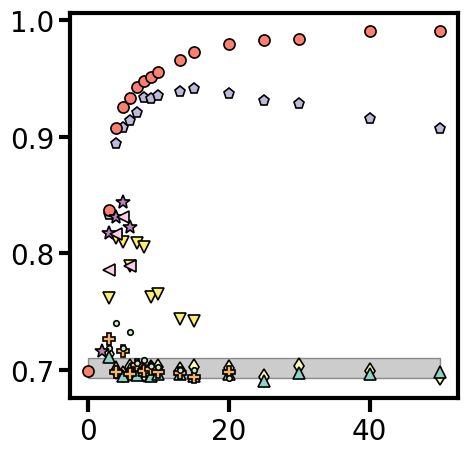

In [31]:
# Set the number of qubits for the experiment
nq = 15

# Load a colormap for visualization
colors = plt.get_cmap("Set3")

# Define property and case name
prop = "r"
case = ""

# Assign colors to each backend for plotting
colors = {
    "ibm_marrakesh": colors(10), "ibm_torino": colors(0), "ibm_brisbane": colors(1),
    "H1-1E": colors(2), "qasm_simulator": colors(3), "H2-1E": colors(4),
    "ibm_fez": colors(5), "H2-1": colors(6), "ionq_aria_2": colors(7),
    "ionq_harmony": colors(8), "ionq_forte": colors(9), "ionq_forte_enterprise":colors(11)
}

# Define marker styles for different backends
markers = {
    "ibm_marrakesh": ".", "ibm_torino": "^", "ibm_brisbane": "d",
    "H1-1E": "p", "qasm_simulator": "o", "H2-1E": "X", "random": ".",
    "ibm_fez": "P", "H2-1": ">", "ionq_aria_2": "<", "ionq_harmony": "D",
    "ionq_forte": "*", "ionq_forte_enterprise": "v",
}

# Create figure and axis for plotting
fig, ax = plt.subplots(figsize=(5,5))

# List of backends to analyze
backends = ["ibm_brisbane", "ibm_torino", "ibm_fez", "ibm_marrakesh", 
            "H1-1E", "qasm_simulator","ionq_forte_enterprise", "ionq_forte", "ionq_aria_2", ]

# Iterate over each backend
for nn, backend_name in enumerate(backends):
    # Load the results for the given backend and qubit size
    results = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
    
    # Extract parameterized circuit depths and sections
    ps = results["ps"]
    sections = results["sections"]
    
    # Iterate over different delta values
    for nn1, delta in enumerate(results["Deltas"]):
        best_yp = 0  # Initialize best performance metric
        
        # Iterate over different sections to find the best result
        for i in results["postprocessing" + case][delta][ps[0]].keys():
            ypi = [results["postprocessing" + case][delta][p][i]["r"] for p in ps]  # Extract performance metrics
            
            # Update best performance if a higher value is found
            if np.max(ypi) > best_yp:
                yp = ypi
                best_yp = max(ypi)
        
        # Print best performance result for debugging
        print(f"QPU: {backend_name} | r = {round(best_yp, 3)}")

        # Plot results for the backend
        ax.plot(
            [ps[nn] for nn, yi in enumerate(yp) if yi > 0],  # X-axis: Parameterized layers
            [yi for yi in yp if yi > 0],  # Y-axis: Performance metric (r)
            marker=markers[backend_name], markeredgecolor="black",
            color=colors[backend_name], linewidth=0, 
            markersize=8 if backend_name != "ionq_forte" else 10
        )

        # Add legend entry for the backend
        ax.plot([], [], marker=markers[backend_name], markeredgecolor="black", 
                color=colors[backend_name], linewidth=0, label=backend_name, markersize=8)

# Process and analyze random sampling data for baseline comparison
rand_data = []
for v, c in zip(results["random" + case]["results"][:, 1], results["random" + case]["results"][:, 2]):
    rand_data += int(c) * [v]  # Expand data based on frequency

# Convert list to numpy array
rand_data = np.array(rand_data)

# Partition random data into sections
secs_rand = 10
div_rand = len(rand_data) // secs_rand
rand_mean = np.array([np.mean(rand_data[i * div_rand:(i + 1) * div_rand]) for i in range(secs_rand)])

# Perform random resampling for uncertainty estimation
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)  # Shuffle data
    rand_mean.append(np.mean(rand_data[:1000]))  # Compute mean over subset

# Convert to numpy array
rand_mean = np.array(rand_mean)

# Compute mean and standard deviation of random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Add shaded region representing the random performance range
ax.fill_between([0, 50], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# Add legend to the plot
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4), ncol=3)

# Save the figure as a PDF file
fig.savefig(f"./Figures/FC/{nq}_FC_random_{prop}_{case}_corr.pdf", bbox_inches="tight", transparent=True)


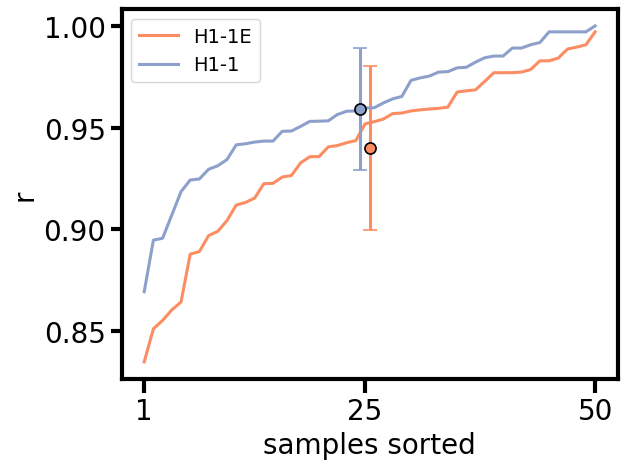

In [23]:
h1_1_results = np.load(f"./Data/H1-1/WMC_Nq20_p20.npy", allow_pickle=True).item()
h1_1E_results = np.load(f"./Data/H1-1E/WMC_Nq20_p20.npy", allow_pickle=True).item()
colors = plt.get_cmap("Set2")
fig, ax = plt.subplots()
y = []
for i in h1_1E_results["postprocessing"][0.4][20][0]["results"]:
    y += int(i[2]) * [i[1]]
x = np.linspace(0,1, len(y))
y1 = []
for i in h1_1_results["h1-1"]["results"]["results"]:
    y1 += int(i[2]) * [i[1]]
x1 = np.linspace(0,1, len(y1))
ax.plot(range(1,51), np.sort(y), label="H1-1E", color=colors(1))
ax.errorbar(25+0.5, np.mean(y), np.std(y), marker="o", capsize=5, color=colors(1), markersize=8, markeredgecolor="black")
ax.plot(range(1,51), np.sort(y1), label="H1-1", color=colors(2))
ax.errorbar(25-0.5, np.mean(y1), np.std(y1), marker="o", capsize=5, color=colors(2), markersize=8, markeredgecolor="black")

ax.legend()
ax.set_xlabel("samples sorted")
ax.set_ylabel("r")
ax.set_xticks([1,25,50])
fig.savefig("./Figures/FC/h1_1_vs_h1_1E.pdf", bbox_inches="tight", transparent=True)

In [4]:
import numpy as np
for nq in [5,7,10,13,15,17,20]:
    res = np.load(f"./Data/H1-1E/{nq}_FC.npy", allow_pickle=True).item()
    res.pop("ids")
    np.save(f"./Data/H1-1E/{nq}_FC.npy", res)


In [ ]:
from scipy.optimize import minimize
colors = plt.get_cmap("Set3")
# def obj_fun(error, k, y_random, y_opt, N_edges, p):
#     y = y_random + (y_opt - y_random) / (1 + (N_edges*p*error/2) ** (k))
#     return y
def obj_fun(error, k, eta, N_edges, p):
    y = y_random + (1 - np.exp(-eta*p)) / (1 + (N_edges*p*error/2) ** (k))
    return y
def fun_ideal(x, y_opt, y_random):
    y = 1 - np.exp(-x[0]*p)
    y_real = y_opt - y_random
    return np.mean((y_real - y)**2)
    
def func(x, nq, ps, y_real, y_random, y_opt):
    error = x[0]
    k = x[1]
    y = np.array([obj_fun(error, k, y_random, y_opt[p], nq, p) for p in ps])
    return np.mean((y - y_real) ** 2)

fig, ax = plt.subplots()
backend_name = "H1-1E"
errors = []
ks = []
nqs = [5,7,10,13,15,17,20]
for i, nq in enumerate(nqs):
    prop = "r"
    graph = "FC"
    results = np.load(f"./Data/{backend_name}/{nq}_{graph}.npy", allow_pickle=True).item()
    ps = results["ps"][:-2]
    results_opt = np.load(f"./Data/qasm_simulator/{nq}_{graph}.npy", allow_pickle=True).item()
    N_edges = results["G"].number_of_edges()
    y_random = results["random"]["r"]
    y_opt = {p:results_opt["postprocessing"][results_opt["Deltas"][0]][p][0][prop] for p in ps}
    y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in ps])
    x0 = [0.001, 0.47641244]
    res = minimize(func, x0, args=(N_edges, ps, y, y_random, y_opt), method="Nelder-Mead")
    ks.append(res.x[1])
    errors.append(res.x[0])
    plt.plot(ps, y, marker="o", linewidth=0, label="real", color=colors(i))
    plt.plot(ps, [y_opt[p] for p in ps], marker="o", linestyle="--", label="ideal", color=colors(i))

    plt.plot(ps, [obj_fun(res.x[0], res.x[1], y_random, y_opt[p], N_edges, p) for p in ps], color=colors(i))


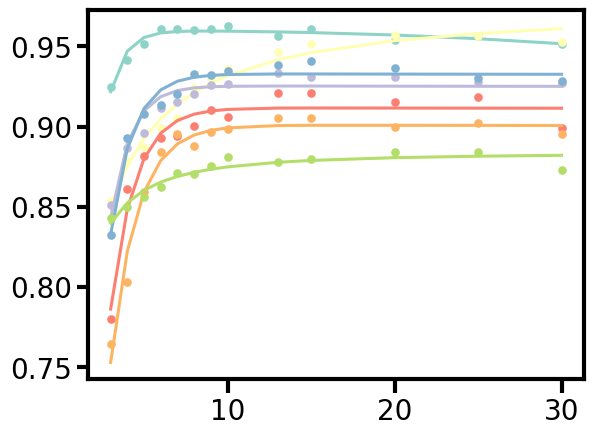

In [314]:
from scipy.optimize import minimize
colors = plt.get_cmap("Set3")
# def obj_fun(error, k, y_random, y_opt, N_edges, p):
#     y = y_random + (y_opt - y_random) / (1 + (N_edges*p*error/2) ** (k))
#     return y
def obj_fun(error, k, eta, A, N_edges, p):
    y = y_random + (A - np.exp(-eta*p)) / (1 + error*(N_edges*p*1e-3/2) ** (k))
    return y
def fun_ideal(x, y_opt, y_random, ps):
    eta = x[0]
    A = x[1]
    y = [A  - np.exp(-eta*p) for p in ps]
    y_real = (y_opt - y_random)/(1-y_random)
    return np.mean((y_real - y)**2)
    
def func(x, nq, ps, y_real):
    error = x[0]
    k = x[1]
    eta = x[2]
    A = x[3]
    y = np.array([obj_fun(error, k, eta, A, nq, p) for p in ps])
    return np.mean((y - y_real) ** 2)

fig, ax = plt.subplots()
backend_name = "H1-1E"
errors = []
ks = []
nqs = [5,7,10,13,15,17,20]
for i, nq in enumerate(nqs):
    prop = "r"
    graph = "FC"
    results = np.load(f"./Data/{backend_name}/{nq}_{graph}.npy", allow_pickle=True).item()
    ps = results["ps"][:-2]
    results_opt = np.load(f"./Data/qasm_simulator/{nq}_{graph}.npy", allow_pickle=True).item()
    N_edges = results["G"].number_of_edges()
    y_random = results["random"]["r"]
    y_opt = np.array([results_opt["postprocessing"][results_opt["Deltas"][0]][p][0][prop] for p in ps])
    y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in ps])
    x0 = [0.01, 0.1, 0.8, 0.3]
    res_opt = minimize(fun_ideal, [1, 0.2], args=(y_opt, y_random, ps), method="Nelder-Mead")
    eta = res_opt.x[0]
    A = res_opt.x[1]
    res = minimize(func, x0, args=(N_edges, ps, y), method="Nelder-Mead")
    ks.append(res.x[1])
    errors.append(res.x[0])
    eta = res.x[2]
    A = res.x[3]
    plt.plot(ps, y, marker="o", linewidth=0, label="real", color=colors(i))
    # plt.plot(ps, (y_opt-y_random)/(1-y_random), marker="o", linestyle="--", label="ideal", color=colors(i))
    # plt.plot(ps, [res_opt.x[1] *(1 - np.exp(-eta*p)) for p in ps], label="ideal", color=colors(i))
    plt.plot(ps, [obj_fun(res.x[0], res.x[1], eta, A, N_edges, p) for p in ps], color=colors(i))


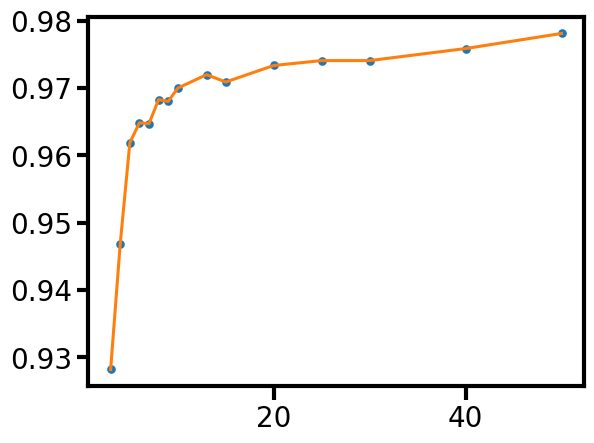

In [123]:
error = 1e-10
k = 1.4
C = 5
backend_name = "H1-1E"
nq = 5
prop = "r"
results = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
results_opt = np.load(f"./Data/qasm_simulator/{nq}_FC.npy", allow_pickle=True).item()

y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in results["ps"]])
y_random = results["random"][prop]
y_opt = {p:results_opt["postprocessing"][results["Deltas"][0]][p][0][prop] for p in results["ps"]}
plt.plot(results["ps"], [y_opt[p] for p in results["ps"]], marker="o", linewidth=0, label="real")
plt.plot(results["ps"], [obj_fun(error, k, C, y_random, y_opt[p],nq,p) for p in results["ps"]])

# Study of the distribution of samples 

In [404]:
import numpy as np
import matplotlib.pyplot as plt
nq = 30
backend_name = "ibm_fez"
results = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
# results = np.load(f"./Data/ionq_forte/{nq}_FC.npy", allow_pickle=True).item()


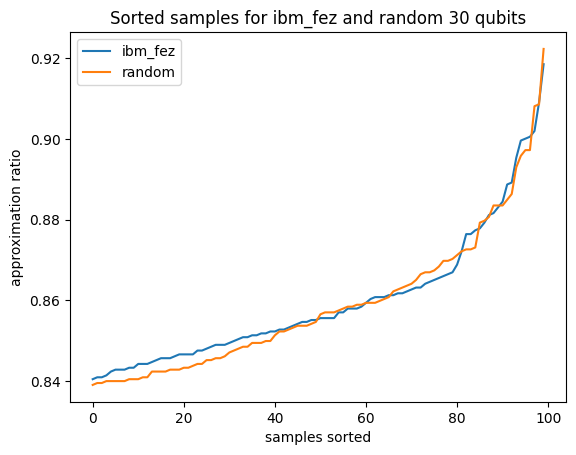

In [405]:
p = 3
sec = 2
delta=results["Deltas"][0]
secs = len(results["postprocessing"][delta][p])
alpha = 0.9
np.random.seed(123)
random_samples = [i[1] for i in results["random"]["results"] for j in range(int(i[2]))]
np.random.shuffle(random_samples)
fig, ax = plt.subplots()
for sec in range(secs):
    samples = [i[1] for i in results["postprocessing"][delta][p][sec]["results"] for j in range(int(i[2]))]
    num_samples = round((1-alpha)*len(samples))
    ax.plot(sorted(samples)[-num_samples:], label=backend_name if sec==0 else None, color="tab:blue")

ax.plot(sorted(random_samples[:len(samples)])[-num_samples:], label="random", color="tab:orange")

ax.legend()
ax.set_xlabel("samples sorted")
ax.set_ylabel("approximation ratio")
ax.set_title(f"Sorted samples for {backend_name} and random {nq} qubits")
fig.savefig(f"./Figures/FC/{backend_name}_sorted_samples_{nq}_alpha_{alpha}.pdf", bbox_inches="tight", transparent=True)

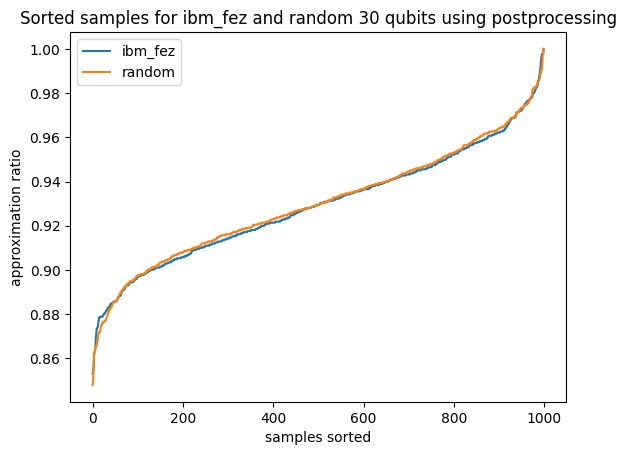

In [406]:
p = 3
sec = 2
secs = len(results["postprocessing"][delta][p])
np.random.seed(1)

fig, ax = plt.subplots()
for sec in range(secs):
    samples = [i[1] for i in results["postprocessing_mitig"][delta][p][sec]["results"] for j in range(int(i[2]))]
    ax.plot(sorted(samples), label="ibm_fez" if sec==0 else None, color="tab:blue")
# ax.plot(1000, max(sorted(samples)), color="tab:blue", marker="o", label="max ibm_fez", linewidth=0)
random_samples = [i[1] for i in results["random_mitig"]["results"] for j in range(int(i[2]))]
np.random.shuffle(random_samples)
ax.plot(sorted(random_samples[:1000]), label="random", color="tab:orange")
# ax.plot(1000, max(random_samples), color="tab:orange", marker="o", label="max random", linewidth=0)

ax.legend()
ax.set_xlabel("samples sorted")
ax.set_ylabel("approximation ratio")
ax.set_title(f"Sorted samples for ibm_fez and random {nq} qubits using postprocessing")
fig.savefig(f"./Figures/FC/{backend_name}_sorted_samples_{nq}_postprocessing.pdf", bbox_inches="tight", transparent=True)

In [313]:
import numpy as np
import matplotlib.pyplot as plt
results= np.load(f"./Data/H2-1/50_FC.npy", allow_pickle=True).item()
# results= np.load(f"./Data/ionq_forte/30_FC.npy", allow_pickle=True).item()


In [314]:
# {(i,j):float(results["G"][i][j]["weight"]) for i, j in results["G"].edges()}

Text(0.5, 0, 'H2-1 Samples sorted')

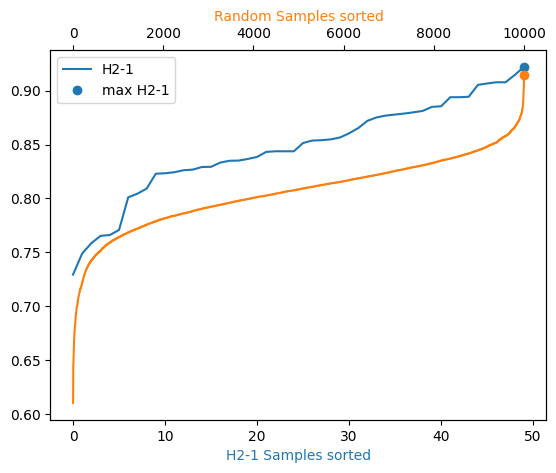

In [316]:
p = 3
sec = 0
delta=results["Deltas"][0]
samples = [i[1] for i in results["postprocessing"][delta][p][sec]["results"] for j in range(int(i[2]))]
fig, ax = plt.subplots()
ax.plot(sorted(samples), label="H2-1")
ax.plot(len(samples)-1, max(sorted(samples)), color="tab:blue", marker="o", label="max H2-1", linewidth=0)
random_samples = [i[1] for i in results["random"]["results"] for j in range(int(i[2]))]
np.random.shuffle(random_samples)
n = 10000#len(samples)
ax2 = ax.twiny()
ax2.plot(sorted(random_samples[:n]), label="random", color="tab:orange")
ax2.plot(n-1, max(random_samples[:n]), color="tab:orange", marker="o", label="max random", linewidth=0)

ax.legend()
ax2.set_xlabel("Random Samples sorted", color="tab:orange")
ax.set_xlabel("H2-1 Samples sorted", color="tab:blue")

In [407]:
import numpy as np
import matplotlib.pyplot as plt
results= np.load(f"./Data/H2-1/40_FC.npy", allow_pickle=True).item()
results_1= np.load(f"./Data/ibm_torino/40_FC.npy", allow_pickle=True).item()


Text(0.5, 0, 'H2-1 Samples sorted')

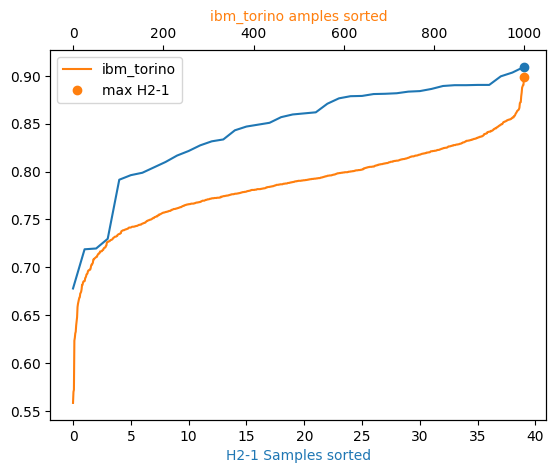

In [415]:
p = 3
sec = 0
delta=results["Deltas"][0]
samples = [i[1] for i in results["postprocessing"][delta][p][sec]["results"] for j in range(int(i[2]))]
fig, ax = plt.subplots()
ax.plot(sorted(samples), label="H2-1")
ax.plot(len(samples)-1, max(sorted(samples)), color="tab:blue", marker="o", label="max H2-1", linewidth=0)
random_samples = [i[1] for i in results["random"]["results"] for j in range(int(i[2]))]
np.random.shuffle(random_samples)
n = 10000#len(samples)
ax2 = ax.twiny()
delta=results_1["Deltas"][0]
samples = [i[1] for i in results_1["postprocessing"][delta][p][sec]["results"] for j in range(int(i[2]))]
ax2.plot(sorted(samples), label="ibm_torino", color="tab:orange")
ax2.plot(len(samples)-1, max(sorted(samples)), color="tab:orange", marker="o", label="max H2-1", linewidth=0)
ax2.legend()
ax2.set_xlabel("ibm_torino amples sorted", color="tab:orange")
ax.set_xlabel("H2-1 Samples sorted", color="tab:blue")